<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport
import re

random.seed(42)
np.random.seed(42)

/home/kovynev-sergey/Documents/python_venvs/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here` Сиды фиксируем для воспроизводимости результатов, отключаем рандом

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [5]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [6]:
sum(df_train.isna().any(axis=1))

203

In [7]:
sum(df_train.isna().any(axis=1))

203

In [8]:
sum(df_train.duplicated())

985

**Ваш ответ здесь.**

Колонки с пропусками - mileage, engine, max_power, torque, seats

Кол-во полных дупбликатов - 985
Кол-во строк с пропусками 203

In [10]:
profile = ProfileReport(df_train).to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]


**Базовые выводы**

Нет пропусков в названии 

В среднем машины конца 13 года, но мода 16 год, пропусков нет

В основном машины бюджетного формата (в среднем 64к), есть выбросы по цене, а также не корректные значения, нужно будет чиститить верхний процентиль

В целом это рынок вторичных авто, но есть и новые. Среднее значение 70к с дисперсией 11%

Можно почистить машины с редкими типами топлива

Нужно обработать данные по расходу топлива и почти все пропуски в этой колонке (нужна глянуть мб можно восстановить по марке или двигателю) - в целом прослеживается на все признаки связанные с двигателем

Нужно обработать признаки по оборотам в минуту и тп, сделать их в числовом формате и разбить на 2 колонки

Сильная корреляция между ценой и годом, трансмиссией, и обратная сильная корреляция между годом и прокатом

Многие падают в дубликаты по ошибке из-за схожих признаков (было бы славно иметь id, а так как минимум искать только полные)



Достаточно много пропущенных, количество дубликатов не так критично.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [ ] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [12]:
df_train.describe()

year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [13]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [14]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [15]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

Среднее и медианы у числовых признаков в тестовой и тренировочной выборке схожи, следовательно выборка репрезентативна. 

**Выводы**

Почти все машины младше 2010 года.

Есть множество дорогих машин которое влияет на среднее из-за чего большая разница с медианой

Почти все машины 5 местные, но есть выбросы которые можно почистить 

Есть разница в стандартном отклонении между выборками, тоже фиксится удалением выбросов

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [ ] Отобразите такие объекты (0.01 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [ ] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [16]:
y_train = df_train['selling_price']
y_test = df_test['selling_price']
X_train = df_train.drop('selling_price', axis=1)
X_test = df_test.drop('selling_price', axis=1)

In [17]:
df_train = df_train.drop_duplicates(subset=X_train.columns, keep='first').reset_index(drop=True)
df_test = df_train.drop_duplicates(subset=X_train.columns, keep='first').reset_index(drop=True)

In [18]:
assert df_train.shape == (5840, 13)

Привести все к одному регистру + стемминг строк

выделить единицы измерения, и стандартизировать форматы

округления, думаю можно все округлить до 0

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [19]:
df_train[['mileage', 'engine', 'max_power']].head()

mileage   engine   max_power
0   23.4 kmpl  1248 CC      74 bhp
1  21.14 kmpl  1498 CC  103.52 bhp
2   23.0 kmpl  1396 CC      90 bhp
3   16.1 kmpl  1298 CC    88.2 bhp
4  20.14 kmpl  1197 CC   81.86 bhp

In [20]:
for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = df_train[col].str.extract(r'([\d.]+)').astype(float)
for col in ['mileage', 'engine', 'max_power']:
    df_test[col] = df_test[col].str.extract(r'([\d.]+)').astype(float)

In [21]:
df_train[['mileage', 'engine', 'max_power']].head()

mileage  engine  max_power
0    23.40  1248.0      74.00
1    21.14  1498.0     103.52
2    23.00  1396.0      90.00
3    16.10  1298.0      88.20
4    20.14  1197.0      81.86

In [22]:
df_train['torque']

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2        22.4 kgm at 1750-2750rpm
3           11.5@ 4,500(kgm@ rpm)
4               113.75nm@ 4000rpm
                  ...            
5835              96.1Nm@ 3000rpm
5836                90Nm@ 3500rpm
5837             113.7Nm@ 4000rpm
5838    24@ 1,900-2,750(kgm@ rpm)
5839               190Nm@ 2000rpm
Name: torque, Length: 5840, dtype: object

In [23]:
def preprocess_torque(torque_series):    
    torque_values = []
    rpm_values = []
    
    for text in torque_series:
        if pd.isna(text):
            torque_values.append(np.nan)
            rpm_values.append(np.nan)
            continue
        
        text = str(text).lower()
        
        torque_match = re.search(r'([\d,\.]+)', text)
        if torque_match:
            torque = float(torque_match.group(1).replace(',', ''))
            if 'kgm' in text or 'kg' in text:
                torque *= 9.80665
            torque_values.append(torque)
        else:
            torque_values.append(np.nan)
        
        rpm_match = re.search(r'[@at]+\s*([\d,\-]+)', text)
        if rpm_match:
            rpm_str = rpm_match.group(1).replace(',', '')
            if '-' in rpm_str:
                rpm = float(rpm_str.split('-')[-1])
            else:
                rpm = float(rpm_str)
            rpm_values.append(rpm)
        else:
            rpm_values.append(np.nan)
    
    return pd.Series(torque_values), pd.Series(rpm_values)

# Применение
df_train['torque'], df_train['max_torque_rpm'] = preprocess_torque(df_train['torque'])

In [24]:
df_test['torque'], df_test['max_torque_rpm'] = preprocess_torque(df_test['torque'])

In [25]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52   
2  Individual       Manual   First Owner    23.00  1396.0      90.00   
3  Individual       Manual   First Owner    16.10  1298.0      88.20   
4  Individual       Manual   First Owner    20.14  1197.0      81.86   

       torque  seats  max_torque_rpm  
0  190.000000    5.0          2000.0  
1  250.000000    5.0          2500.0  
2  219.668960    5.0          2750.0  
3  112.776475    5.0          4500.0  
4  113.750000    5.0          4000.0

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [26]:
numeric_cols = ['mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm', 'seats']
for col in numeric_cols:
    median_value = df_train[col].median()
    df_train[col] = df_train[col].fillna(median_value)
    df_test[col] = df_test[col].fillna(median_value)

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   float64
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   float64
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


Пропусков не осталось, медиана более устойчива к выбросам чем среднее, а выбросы у нас есть)

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [29]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)


Можно указать кол-во сидений как категориальный признак, тк мы имеем четкие 5 категорий по кол-ву мест. Данные категории могут иметь конкретные названия они ограничены (популярные) 

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [30]:
print(f'Train\n',df_train.describe())
print(f'\nTest\n',df_test.describe())

Train
               year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   175.930478     5.426712     3046.251370  
std      31.640418   116.757608     0.982344      910.125395  
min       0.000000    47.071920     2.000000   

Нет не могло, у нас не могло поменяться распределение потому что мы заполняли mean, оно и так в центре, добавление новых переменных которые в центре медианы не сдвигает медиану



## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

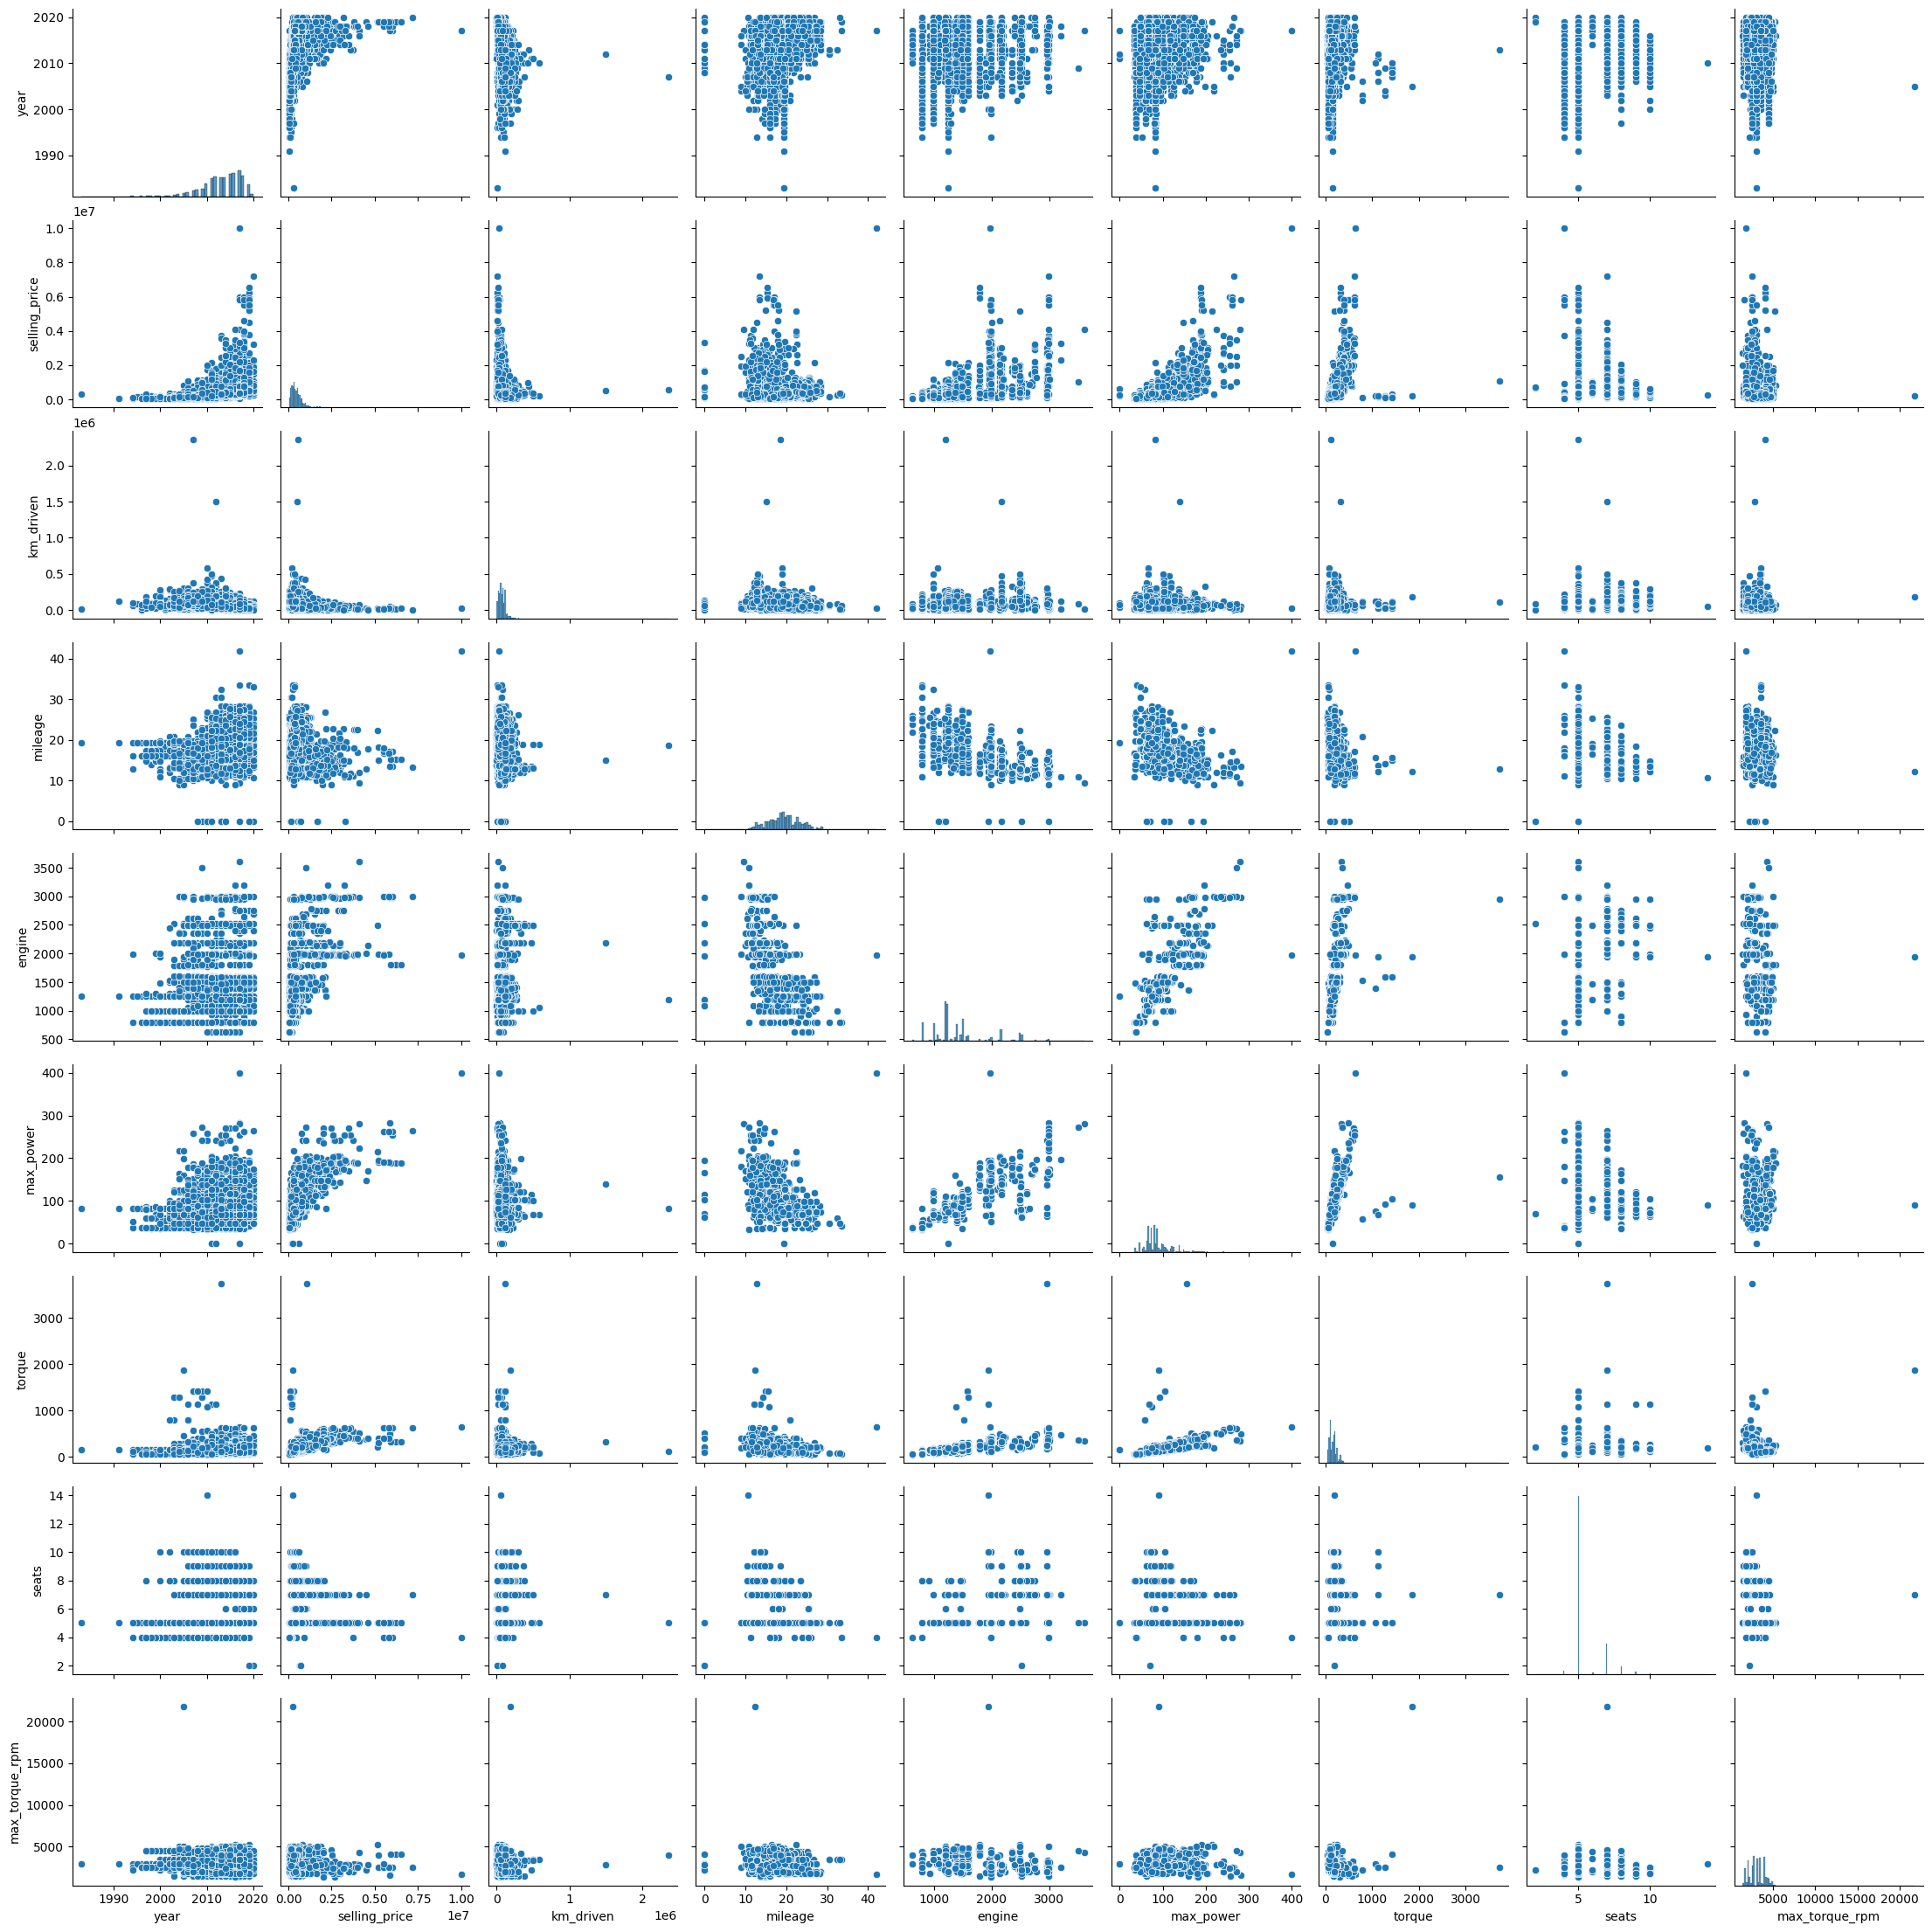

In [31]:
corr_train = sns.pairplot(df_train)
corr_train

По этим данным можно сказать и о зависимости с целевой переменной к примеру год выпуска, так и о корреляции признаков - зависимости мощности от двигателя

просто отразить текстовы данные не выйдет, я их закодирую

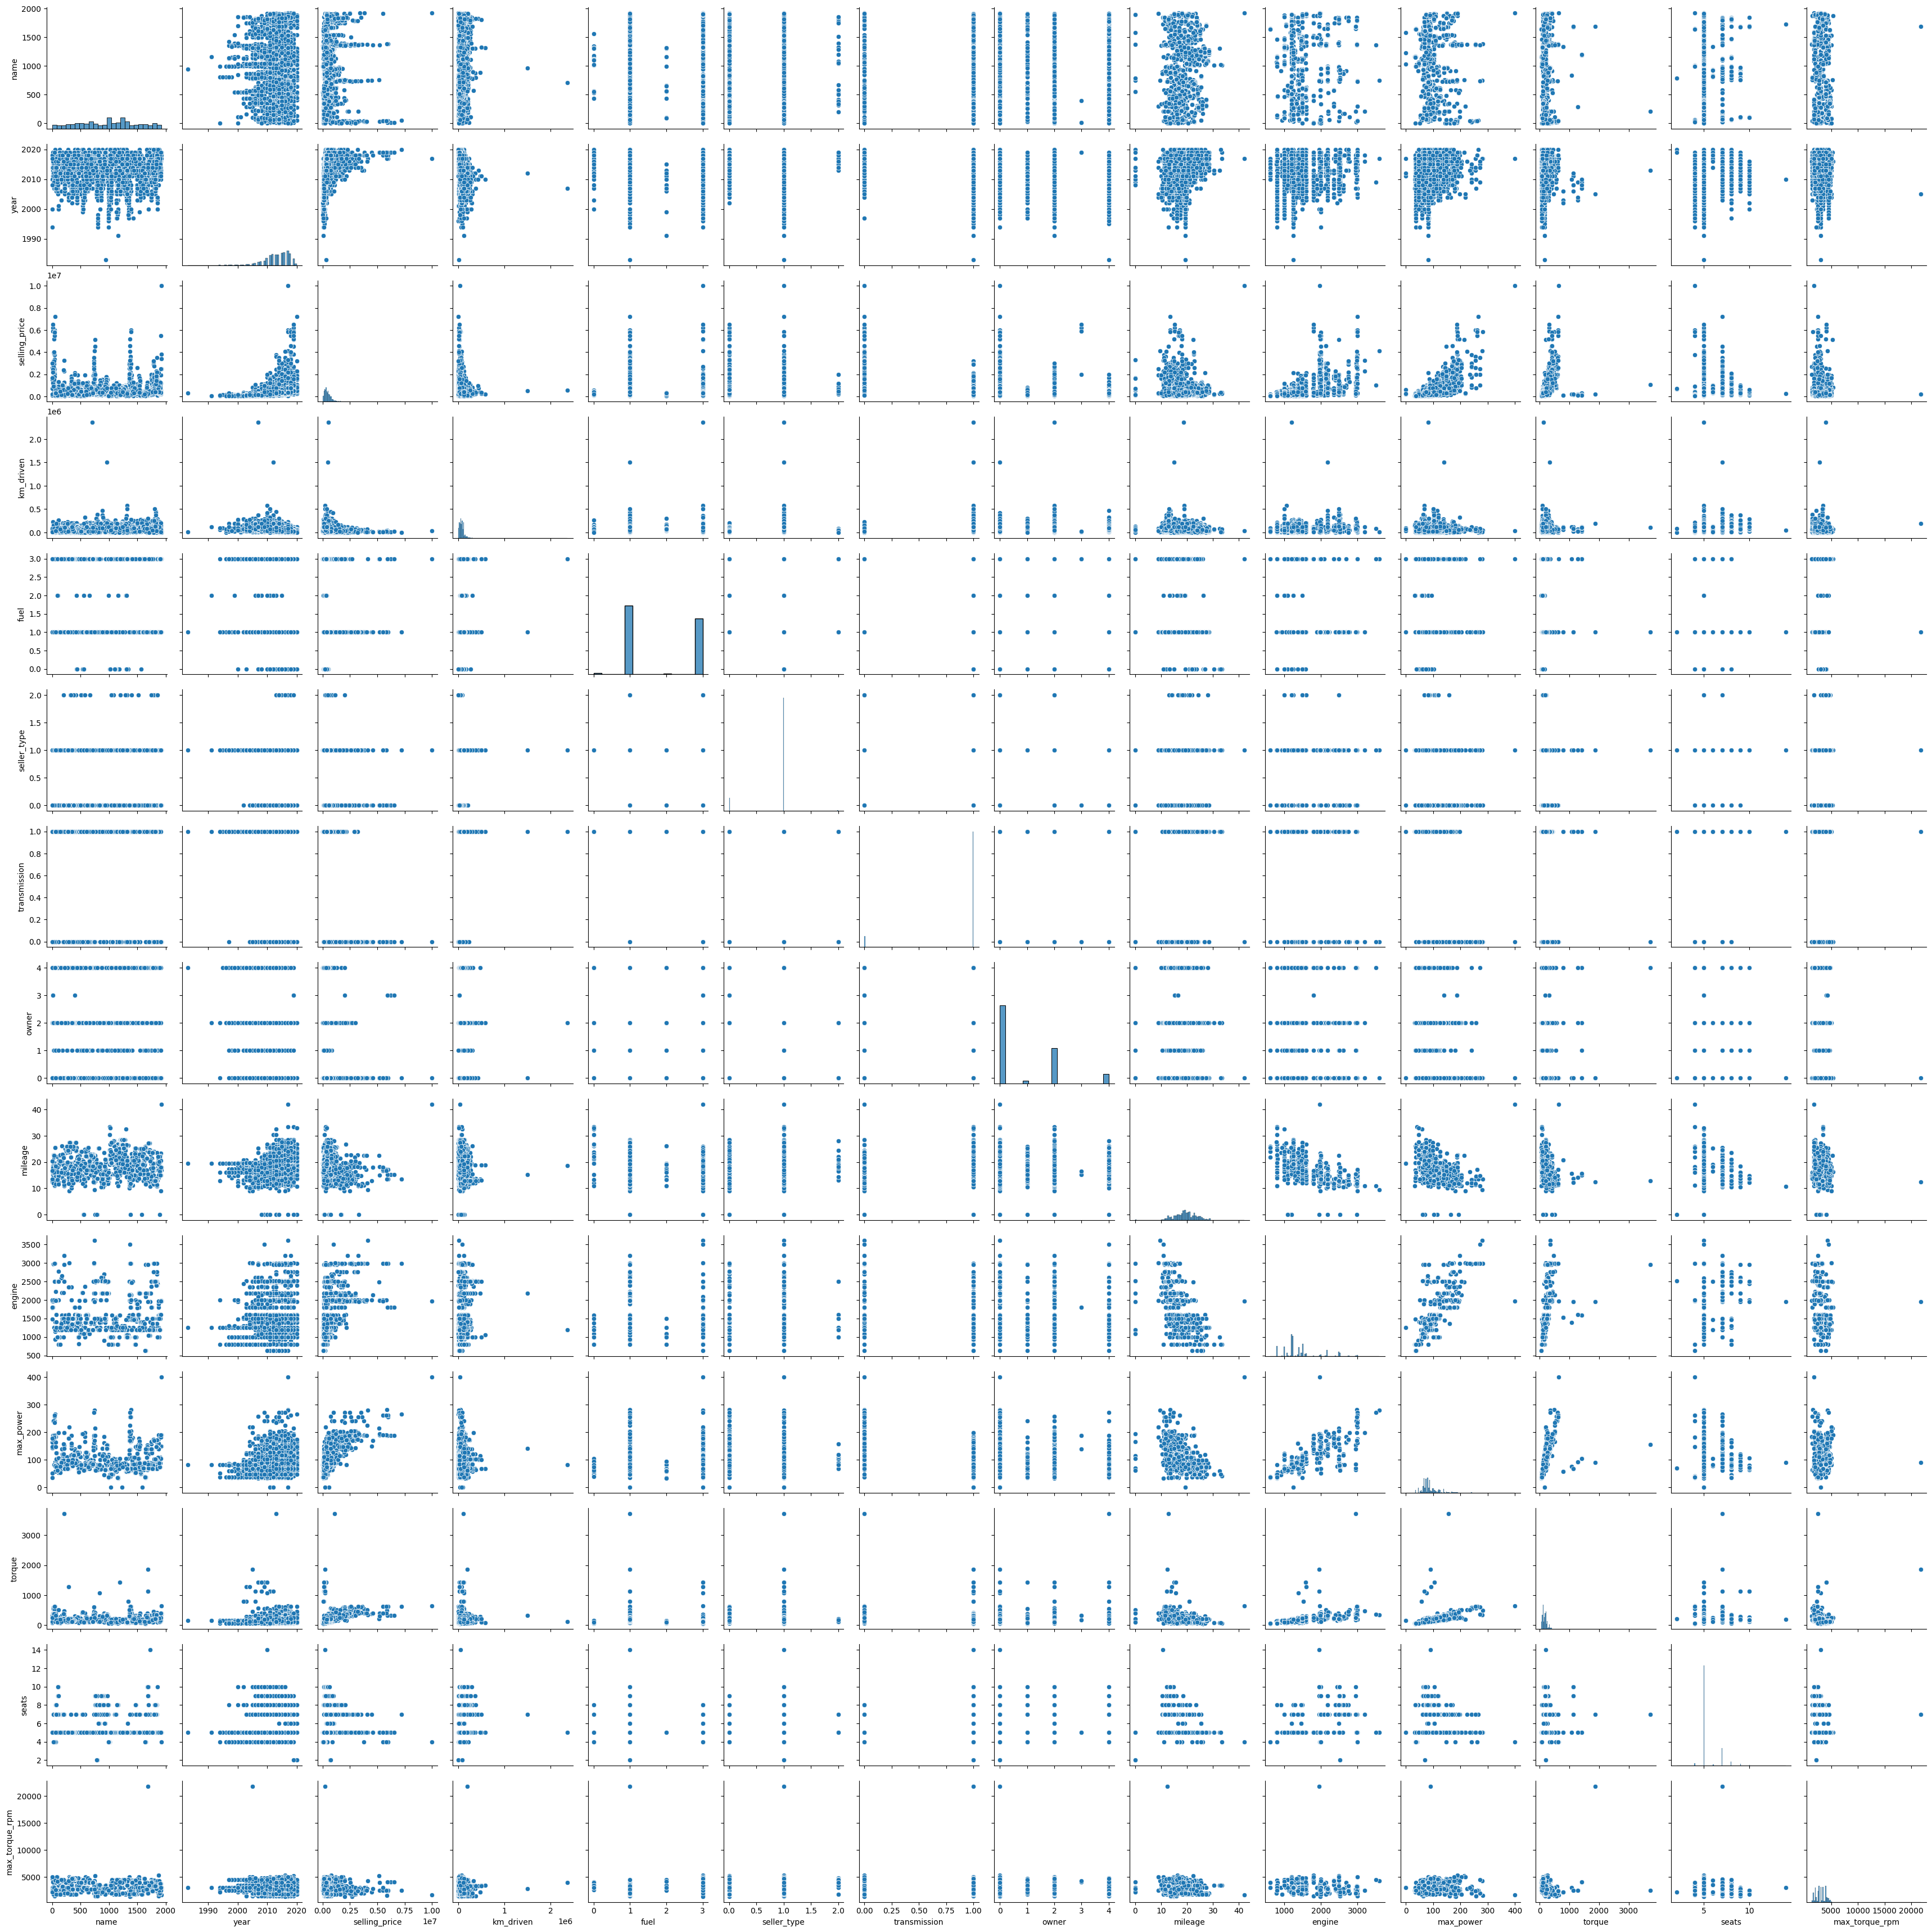

In [32]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_train.copy()

categorical_cols = df_encoded.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

sns.pairplot(df_encoded)
plt.show()

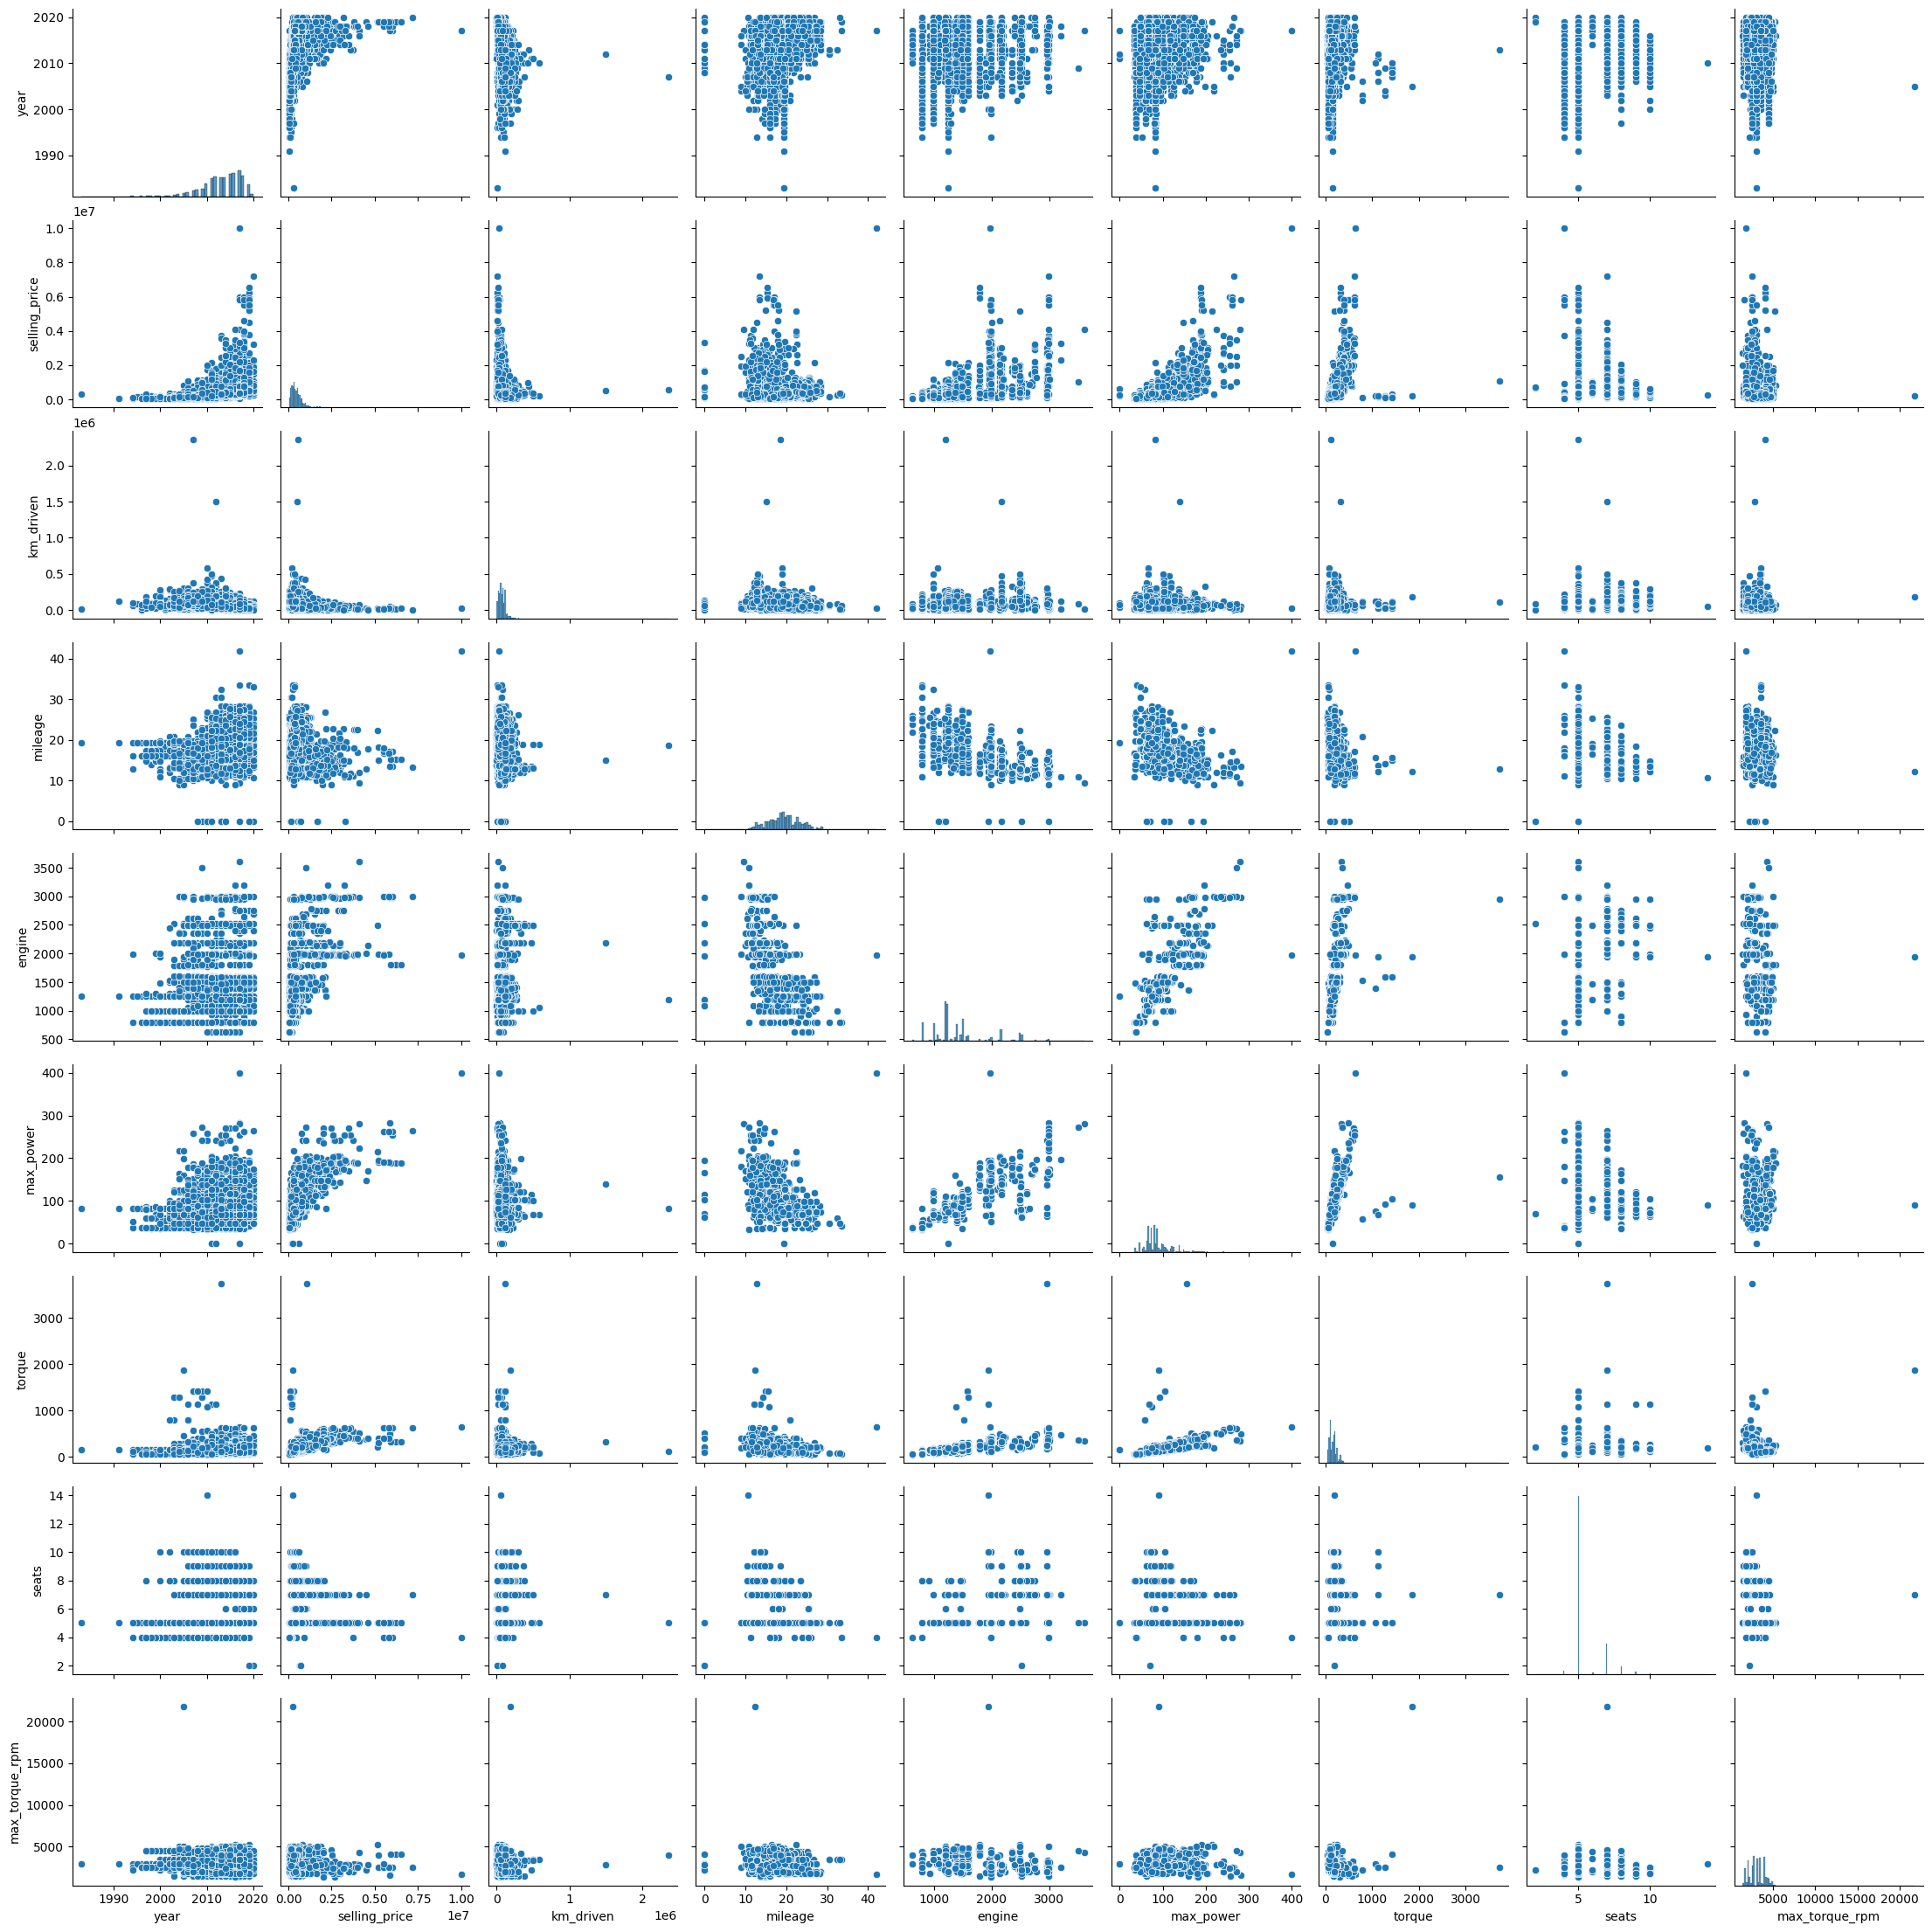

In [33]:
df_encoded_test = df_test.copy()

categorical_cols = df_encoded.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

sns.pairplot(df_encoded_test)
plt.show()

на тесте нет пары примеров, но в целом очень пхожи

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

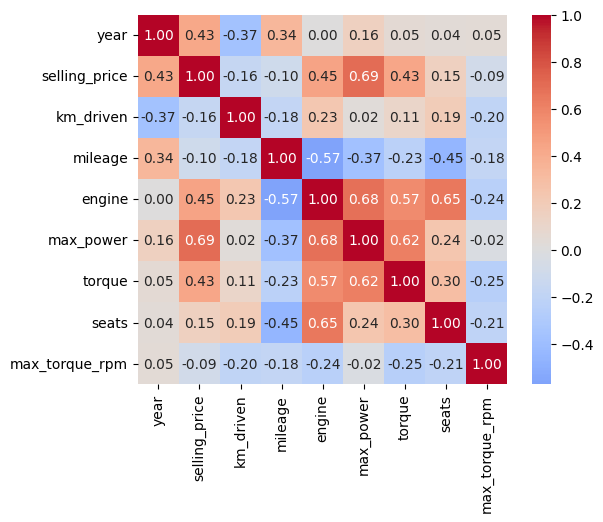

In [34]:
corr_mat_train = df_train.corr(numeric_only=True)
sns.heatmap(
    corr_mat_train,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True
)



- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

Наименее скоррелтрованы - год выпуска с кол-вом сидений и оборотами

Сильная зависимость между (ценой и мощность) (двигателем и потреблением)

Да, это верное утверждение, это и есть обратная корреляция

Корреляция пирсона

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [35]:
def kendall_correlation(x, y):
    n = len(x)
    concordant = 0
    discordant = 0
    ties_x = 0
    ties_y = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            dx = x[i] - x[j]
            dy = y[i] - y[j]
            
            sign = dx * dy
            
            if sign > 0:
                concordant += 1
            elif sign < 0:
                discordant += 1
            else:
                if dx == 0:
                    ties_x += 1
                if dy == 0:
                    ties_y += 1
    
    numerator = concordant - discordant
    denominator = np.sqrt((concordant + discordant + ties_x) * 
                          (concordant + discordant + ties_y))
    
    if denominator == 0:
        return 0
    
    return numerator / denominator

def kendall_correlation_matrix(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    n_cols = len(numeric_cols)
    corr_matrix = np.zeros((n_cols, n_cols))
    
    total_pairs = n_cols * (n_cols - 1) // 2
    current = 0
    
    for i, col1 in enumerate(numeric_cols):
        for j, col2 in enumerate(numeric_cols):
            if i == j:
                corr_matrix[i, j] = 1.0
            elif i < j:
                current += 1
                print(f"\rВычисляем {current}/{total_pairs}: {col1} ↔ {col2}...", end="")
                
                x = df[col1].values
                y = df[col2].values
                tau = kendall_correlation(x, y)
                corr_matrix[i, j] = tau
                corr_matrix[j, i] = tau
    
    corr_df = pd.DataFrame(corr_matrix, index=numeric_cols, columns=numeric_cols)
    return corr_df

In [36]:
kendall_matrix = kendall_correlation_matrix(df_train)

Вычисляем 36/36: seats ↔ max_torque_rpm.......m...

<Axes: >

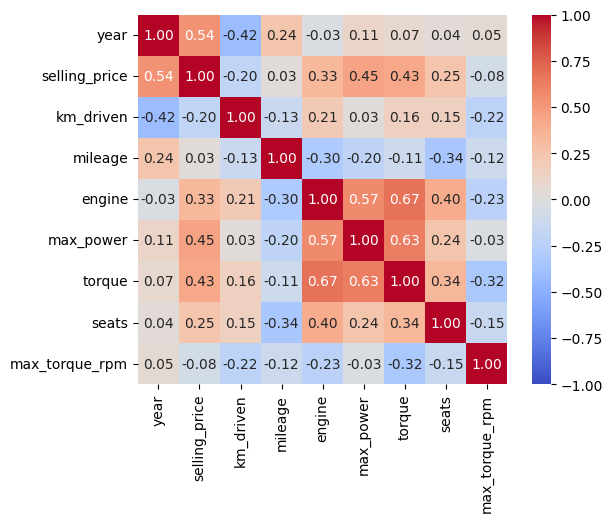

In [37]:
sns.heatmap(kendall_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, vmin=-1, vmax=1)



<Axes: >

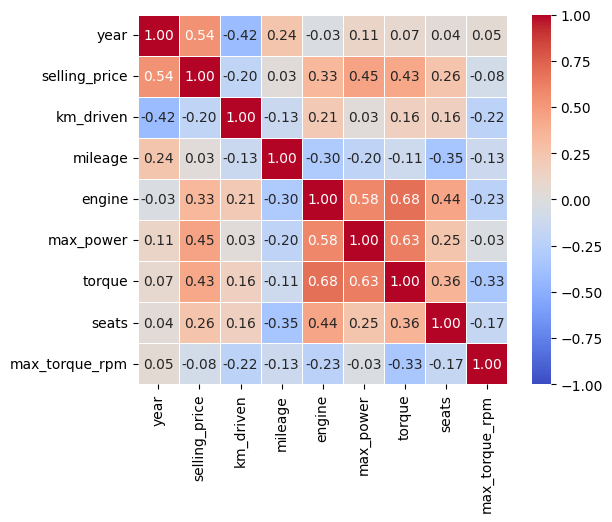

In [38]:
pandas_kendall = df_train.corr(method='kendall',numeric_only=True)
sns.heatmap(pandas_kendall, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, vmin=-1, vmax=1, linewidths=0.5)



Моя реализация Кендалла совпадаетс с библиотечной до 0.01, но работает в разы дольше 

year - selling_price потому что зависимость монотонная, но нелинейная

+ есть выбросы, которые смещают Пирсона 

Для большинства пар признаков все два метода дают похожие результаты, следовательно зависимости близки к линейным

### **Дополнительные визуализации (бонус 0.25 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.
Один график: 0.125 балла, при условии, что он обоснован.

In [39]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [40]:
df_train_numeric = df_train.select_dtypes(include=[np.number]).copy()
df_test_numeric = df_test.select_dtypes(include=[np.number]).copy()

y_train = df_train_numeric['selling_price']
X_train = df_train_numeric.drop(columns=['selling_price'])

y_test = df_test_numeric['selling_price']
X_test = df_test_numeric.drop(columns=['selling_price'])

In [41]:
print("Признаки X_train", X_train.columns.tolist())
print("Размер X_train", X_train.shape)
print("Размер y_train", y_train.shape)


Признаки X_train ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']
Размер X_train (5840, 8)
Размер y_train (5840,)


### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression().fit(X_train, y_train)

print(f'R2 на train = ',r2_score(y_train, model.predict(X_train)))
print(f'R2 на test = ',r2_score(y_test, model.predict(X_test)))

print(f'\nMSE на train = ', MSE(y_train, model.predict(X_train)))
print(f'MSE на test = ', MSE(y_test, model.predict(X_test)))

print(f'\nКоэффициенты ', model.coef_)

R2 на train =  0.6006060002236671
R2 на test =  0.6006060002236671

MSE на train =  114481632445.9982
MSE на test =  114481632445.9982

Коэффициенты  [ 4.03152123e+04 -8.12721968e-01 -1.78186126e+03  5.03897164e+01
  1.04244464e+04  4.35205714e+01 -3.07837856e+04 -6.33964090e+01]


### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [43]:
def r2_m(y_true, y_pred):
    y_true = np.array(y_true) 
    y_pred = np.array(y_pred)
    
    ss_res = np.sum((y_true - y_pred) ** 2) # Сумма ошибка модели, то есть насколько сильно отличаются предсказания модели от реальных данных 
    # квадрат нужен чтобы ошибки не компенсировалиись
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2) # Измеряем насколько каждое реальное значение отклоняется от среднего, возводим в квадрат и суммируем.
    
    return 1 - ss_res / ss_tot

In [44]:
print(f'R2 на train = ',r2_score(y_train, model.predict(X_train)))
print(f'R2 на test = ',r2_score(y_test, model.predict(X_test)))

print(f'R2 my на train = ',r2_m(y_train, model.predict(X_train)))
print(f'R2 my на test = ',r2_m(y_test, model.predict(X_test)))



R2 на train =  0.6006060002236671
R2 на test =  0.6006060002236671
R2 my на train =  0.6006060002236671
R2 my на test =  0.6006060002236671


R2 = 1 - SS_res / SS_tot SS_res = sum((y_true - y_pred)^2) сумма квадратов остатков. y_true это реальное значение, y_pred это предсказание модели. Разность между ними это ошибка модели на конкретном объекте. SS_res показывает суммарную ошибку модели. SS_tot = sum((y_true - mean(y_true))^2) общая сумма квадратов. mean(y_true) это среднее значение целевой переменной. SS_tot показывает общую вариацию в данных. SS_res / SS_tot доля необъясненной вариации 1 - SS_res / SS_tot доля объясненной вариации, это R2 какую часть вариации целевой переменной модель смогла объяснить с помощью признаков

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [45]:
def adjusted_r2(y_true, y_pred, n_features):
    n = len(y_true)  
    p = n_features  
    
    r2 = r2_m(y_true, y_pred)
    
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

In [46]:
print(f'R2 на train = ',r2_score(y_train, model.predict(X_train)))
print(f'R2 на test = ',r2_score(y_test, model.predict(X_test)))

n_features = X_train.shape[1]
print(f'adjusted_r2 на train = ',adjusted_r2(y_train, model.predict(X_train), n_features))
print(f'adjusted_r2 на test = ',adjusted_r2(y_test, model.predict(X_test), n_features))



R2 на train =  0.6006060002236671
R2 на test =  0.6006060002236671
adjusted_r2 на train =  0.6000580406973061
adjusted_r2 на test =  0.6000580406973061


Adjusted R2 = 1 - (1 - R2) * (n - 1) / (n - p - 1) Обычный R всегда растет при добавлении новых признаков, даже если они бесполезны. Adjusted R решает эту проблему он штрафует модель за каждый добавленный признак. Если новый признак не дает достаточного прироста в качестве, Adjusted R может даже уменьшиться. Поэтому Adjusted R используют при сравнении моделей с разным количеством признаков он показывает, действительно ли добавление признака улучшило модель или это просто переобучение.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [48]:
model_scaled = LinearRegression().fit(X_train_scaled, y_train)

print(f'R2 на train = ',r2_score(y_train, model_scaled.predict(X_train_scaled)))
print(f'R2 на test = ',r2_score(y_test, model_scaled.predict(X_test_scaled)))

print(f'\nMSE на train = ', MSE(y_train, model_scaled.predict(X_train_scaled)))
print(f'MSE на test = ', MSE(y_test, model_scaled.predict(X_test_scaled)))


R2 на train =  0.6006060002236682
R2 на test =  0.6006060002236682

MSE на train =  114481632445.99788
MSE на test =  114481632445.99788


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [49]:
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': model_scaled.coef_,
    'abs_coefficient': np.abs(model_scaled.coef_)
}).sort_values('abs_coefficient', ascending=False)

print(coef_df)

          feature    coefficient  abs_coefficient
4       max_power  329805.603277    329805.603277
0            year  165101.731056    165101.731056
7  max_torque_rpm  -57693.741580     57693.741580
1       km_driven  -48816.952209     48816.952209
6           seats  -30237.676410     30237.676410
3          engine   24470.317120     24470.317120
2         mileage   -7101.843068      7101.843068
5          torque    5080.922736      5080.922736


для предскаазания цены самый информативный признак это max_power и year

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [50]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

print('R2 на train =', lasso.score(X_train_scaled, y_train))
print('R2 на test =', lasso.score(X_test_scaled, y_test))

print('\nMSE на train =', MSE(y_train, lasso.predict(X_train_scaled)))
print('MSE на test =', MSE(y_test, lasso.predict(X_test_scaled)))

R2 на train = 0.6006060001761244
R2 на test = 0.6006060001761244

MSE на train = 114481632459.62573
MSE на test = 114481632459.62573


In [51]:
coef_lasso = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lasso.coef_
})
print('\nКоэффициенты Lasso = ', coef_lasso)


Коэффициенты Lasso =            feature    coefficient
0            year  165099.534038
1       km_driven  -48816.009747
2         mileage   -7098.557827
3          engine   24468.303342
4       max_power  329806.989704
5          torque    5080.285419
6           seats  -30233.692032
7  max_torque_rpm  -57691.646097


In [52]:
coef_lasso[coef_lasso['coefficient'] == 0]

Empty DataFrame
Columns: [feature, coefficient]
Index: []

L1 регулиризация не занулила веса, потому чо значение alpha очень маленькре для целевой переменной, нам нужно поставить больший alpha параметр, тогда будет больше штраф за нулевые веса

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] # взял чуть больше чем в лекции
}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='r2', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
             return_train_score=True, scoring='r2')

In [59]:
print('Лучшие параметры=', grid_search.best_params_)
print('Лучший R2 на кросс-валидации=', grid_search.best_score_)

Лучшие параметры= {'alpha': 10000}
Лучший R2 на кросс-валидации= 0.5802593065743744


In [60]:
best_lasso = grid_search.best_estimator_
print('\nR2 на train = ', best_lasso.score(X_train_scaled, y_train))
print('R2 на test = ', best_lasso.score(X_test_scaled, y_test))




R2 на train =  0.5977915054543519
R2 на test =  0.5977915054543519


In [61]:
coef_best = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': best_lasso.coef_
})
print(f'\nКоэффициенты лучшей модели =\n',coef_best)


Коэффициенты лучшей модели =
           feature    coefficient
0            year  153708.925348
1       km_driven  -38903.460033
2         mileage       0.000000
3          engine       0.000000
4       max_power  336705.475473
5          torque       9.078100
6           seats      -0.000000
7  max_torque_rpm  -44683.790719


In [62]:
coef_best[coef_best['coefficient'] == 0]

feature  coefficient
2  mileage          0.0
3   engine          0.0
6    seats         -0.0

    Получается что грид серчу пришлось обучать 10 (кол-во фолодов) * количетсво alpha = 10 * 8 = 80

    Альфа это коэффициент регуляризации в Лассо, определяет силу штрафа за нулевые весы, чем больше штраф тем сильнее модель будет занулять веса
    
    Лучший 10000, занулилсь mileage, engine

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [63]:
from sklearn.linear_model import ElasticNet

In [64]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [65]:
elastic = ElasticNet()
grid_search_elastic = GridSearchCV(elastic, param_grid, cv=10, scoring='r2', return_train_score=True)
grid_search_elastic.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             return_train_score=True, scoring='r2')

In [66]:
print('Лучшие параметры = ', grid_search_elastic.best_params_)
print('Лучший R2 =', grid_search_elastic.best_score_)

Лучшие параметры =  {'alpha': 1, 'l1_ratio': 0.9}
Лучший R2 = 0.5804778644529133


In [67]:
best_elastic = grid_search_elastic.best_estimator_
print('\nR2 на train = ', best_elastic.score(X_train_scaled, y_train))
print('R2 на test = ', best_elastic.score(X_test_scaled, y_test))

print('\nMSE на train = ', MSE(y_train, best_elastic.predict(X_train_scaled)))
print('MSE на test = ', MSE(y_test, best_elastic.predict(X_test_scaled)))


R2 на train =  0.5952313204456046
R2 на test =  0.5952313204456046

MSE на train =  116022221726.78778
MSE на test =  116022221726.78778




Пришлось обучать 8 * 5 * 10 = 400 моделей Лучшие параметры (alpha=1, l1_ratio=0.9)


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [68]:
from itertools import combinations

In [69]:
def l0_regression(X, y, max_features):
    best_score = -np.inf
    best_features = None
    best_model = None
    
    for k in range(1, max_features + 1):
        for features in combinations(range(X.shape[1]), k):
            X_sub = X.iloc[:, list(features)] 
            model = LinearRegression().fit(X_sub, y)
            score = model.score(X_sub, y)
            
            if score > best_score:
                best_score = score
                best_features = features
                best_model = model
                
    return best_model, best_features

In [70]:
for max_f in range(1, X_train.shape[1]+1):
    model, features = l0_regression(X_train_scaled, y_train, max_f)
    
    X_train_sub = X_train_scaled.iloc[:, list(features)]
    X_test_sub = X_test_scaled.iloc[:, list(features)]
    
    print(f"\nmax_features={max_f}")
    print(f"\nПризнаки = {[X_train.columns[i] for i in features]}")
    print(f"\nR2 train =  {model.score(X_train_sub, y_train):.4f}")
    print(f"\nR2 test =  {model.score(X_test_sub, y_test):.4f}\n")



max_features=1

Признаки = ['max_power']

R2 train =  0.4800

R2 test =  0.4800


max_features=2

Признаки = ['year', 'max_power']

R2 train =  0.5841

R2 test =  0.5841


max_features=3

Признаки = ['year', 'max_power', 'max_torque_rpm']

R2 train =  0.5920

R2 test =  0.5920


max_features=4

Признаки = ['year', 'km_driven', 'max_power', 'max_torque_rpm']

R2 train =  0.5991

R2 test =  0.5991


max_features=5

Признаки = ['year', 'km_driven', 'max_power', 'seats', 'max_torque_rpm']

R2 train =  0.5998

R2 test =  0.5998


max_features=6

Признаки = ['year', 'km_driven', 'engine', 'max_power', 'seats', 'max_torque_rpm']

R2 train =  0.6005

R2 test =  0.6005


max_features=7

Признаки = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'max_torque_rpm']

R2 train =  0.6006

R2 test =  0.6006


max_features=8

Признаки = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

R2 train =  0.6006

R2 test =  0.6006



Самый важный признак это max_power, он является главным признаком для предсказания цены, дает 48% точность Добавление года выпуска, прибавило 10% в точности Остальные внесли минимальный прирост Можно выделить 4 признака, ['year', 'km_driven', 'max_power', 'max_torque_rpm'/'seats]. Max_torque_rpm связан с max_power, его можно выкинуть в целом. Набор этих признаком дает R = 0.62, использование оставишхся почти не добавляет точности.

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [71]:
df_train['name'].head(10)

0                  Maruti Swift Dzire VDI
1            Skoda Rapid 1.5 TDI Ambition
2               Hyundai i20 Sportz Diesel
3                  Maruti Swift VXI BSIII
4           Hyundai Xcent 1.2 VTVT E Plus
5            Maruti Wagon R LXI DUO BSIII
6                      Maruti 800 DX BSII
7                        Toyota Etios VXD
8    Ford Figo Diesel Celebration Edition
9         Renault Duster 110PS Diesel RxL
Name: name, dtype: object

In [72]:
df_train['name'].nunique()

1924

In [73]:
df_train['brand'] = df_train['name'].str.split().str[0]
df_test['brand'] = df_test['name'].str.split().str[0]

In [74]:
df_train['brand'].nunique()

30

In [75]:
df_train['brand'].value_counts().head(10)

brand
Maruti        1804
Hyundai       1058
Mahindra       611
Tata           534
Toyota         309
Ford           308
Honda          308
Chevrolet      188
Renault        171
Volkswagen     153
Name: count, dtype: int64

In [76]:
numeric_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']

In [77]:
cat_cols = ['brand', 'fuel', 'seller_type', 'transmission']

In [78]:
X_train_cat = df_train[numeric_cols + cat_cols].copy()
X_test_cat = df_test[numeric_cols + cat_cols].copy()

In [79]:
X_train_cat.shape

(5840, 11)

In [80]:
X_train_cat.columns.tolist()

['year',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'seats',
 'brand',
 'fuel',
 'seller_type',
 'transmission']

In [81]:
assert X_train_cat.shape == (5840, 11)

In [82]:
X_train_cat.describe(include='object')

brand    fuel seller_type transmission
count     5840    5840        5840         5840
unique      30       4           3            2
top     Maruti  Diesel  Individual       Manual
freq      1804    3177        5223         5336

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [83]:
ohe_cols = ['brand', 'fuel', 'seller_type', 'transmission', 'seats']
num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']

In [84]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train_cat[ohe_cols])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [85]:
X_train_ohe = ohe.transform(X_train_cat[ohe_cols])
X_test_ohe = ohe.transform(X_test_cat[ohe_cols])

ohe_feature_names = ohe.get_feature_names_out(ohe_cols)

X_train_final = pd.concat([
    X_train_cat[num_cols].reset_index(drop=True),
    pd.DataFrame(X_train_ohe, columns=ohe_feature_names)
], axis=1)

X_test_final = pd.concat([
    X_test_cat[num_cols].reset_index(drop=True),
    pd.DataFrame(X_test_ohe, columns=ohe_feature_names)
], axis=1)



In [86]:
X_train_final.shape

(5840, 49)

In [87]:
X_train_final.columns.tolist()

['year',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'brand_Audi',
 'brand_BMW',
 'brand_Chevrolet',
 'brand_Daewoo',
 'brand_Datsun',
 'brand_Fiat',
 'brand_Force',
 'brand_Ford',
 'brand_Honda',
 'brand_Hyundai',
 'brand_Isuzu',
 'brand_Jaguar',
 'brand_Jeep',
 'brand_Kia',
 'brand_Land',
 'brand_Lexus',
 'brand_MG',
 'brand_Mahindra',
 'brand_Maruti',
 'brand_Mercedes-Benz',
 'brand_Mitsubishi',
 'brand_Nissan',
 'brand_Peugeot',
 'brand_Renault',
 'brand_Skoda',
 'brand_Tata',
 'brand_Toyota',
 'brand_Volkswagen',
 'brand_Volvo',
 'fuel_Diesel',
 'fuel_LPG',
 'fuel_Petrol',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer',
 'transmission_Manual',
 'seats_4',
 'seats_5',
 'seats_6',
 'seats_7',
 'seats_8',
 'seats_9',
 'seats_10',
 'seats_14']

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

One got encoding нужно обучать только на train данныих и применять к обоим датасетам. После нужно выровнять столбцы. Чтобы избежать мультиколлинеарности, чтобы матрица не становилас вырожденой. Нет, так нельзя делать, мы потеряем информацию о различиии между категориями


### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [88]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

In [89]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler_cat = StandardScaler()

X_train_cat_scaled = scaler_cat.fit_transform(X_train_final)
X_test_cat_scaled = scaler_cat.transform(X_test_final)



In [90]:
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=10, scoring='r2')
grid_search_ridge.fit(X_train_cat_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
             scoring='r2')

In [91]:
print('Лучший a =', grid_search_ridge.best_params_)
print('Лучший R2 =', grid_search_ridge.best_score_)

Лучший a = {'alpha': 1000}
Лучший R2 = 0.7025348735320197


In [92]:
best_ridge = grid_search_ridge.best_estimator_
print('\nR2 на train =', best_ridge.score(X_train_cat_scaled, y_train))
print('R2 на test =', best_ridge.score(X_test_cat_scaled, y_test))

print('\nMSE на train =', MSE(y_train, best_ridge.predict(X_train_cat_scaled)))
print('MSE на test =', MSE(y_test, best_ridge.predict(X_test_cat_scaled)))


R2 на train = 0.7406295506257241
R2 на test = 0.7406295506257241

MSE на train = 74345514627.78076
MSE на test = 74345514627.78076


# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [93]:
df_train_fe = df_train.copy()
df_test_fe = df_test.copy()

In [94]:
df_train_fe['power_per_liter'] = df_train_fe['max_power'] / (df_train_fe['engine'] / 1000)
df_test_fe['power_per_liter'] = df_test_fe['max_power'] / (df_test_fe['engine'] / 1000)


In [95]:
df_train_fe['year_squared'] = df_train_fe['year'] ** 2
df_test_fe['year_squared'] = df_test_fe['year'] ** 2


In [96]:
df_train_fe['age'] = 2025 - df_train_fe['year']
df_test_fe['age'] = 2025 - df_test_fe['year']


In [97]:
df_train_fe['km_per_year'] = df_train_fe['km_driven'] / df_train_fe['age'].replace(0, 1)
df_test_fe['km_per_year'] = df_test_fe['km_driven'] / df_test_fe['age'].replace(0, 1)


In [98]:
df_train_fe['is_first_owner'] = (df_train_fe['owner'] == 'First Owner').astype(int)
df_test_fe['is_first_owner'] = (df_test_fe['owner'] == 'First Owner').astype(int)


In [99]:
df_train_fe['many_owners'] = df_train_fe['owner'].isin(['Third Owner', 'Fourth & Above Owner']).astype(int)
df_test_fe['many_owners'] = df_test_fe['owner'].isin(['Third Owner', 'Fourth & Above Owner']).astype(int)


In [100]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


In [101]:
df_train_fe['log_km'] = np.log1p(df_train_fe['km_driven'])
df_test_fe['log_km'] = np.log1p(df_test_fe['km_driven'])


In [102]:
df_train_fe[['power_per_liter', 'year_squared', 'age', 'km_per_year', 'is_first_owner', 'log_km']].head()

power_per_liter  year_squared  age   km_per_year  is_first_owner     log_km
0        59.294872       4056196   11  13227.272727               1  11.887938
1        69.105474       4056196   11  10909.090909               0  11.695255
2        64.469914       4040100   15   8466.666667               1  11.751950
3        67.950693       4028049   18   6666.666667               1  11.695255
4        68.387636       4068289    8   5625.000000               1  10.714440

In [103]:
feature_cols = ['year', 'year_squared', 'age', 'km_driven', 'log_km', 'km_per_year',
                'mileage', 'engine', 'max_power', 'torque', 'power_per_liter', 'is_first_owner']
cat_cols = ['brand', 'fuel', 'transmission', 'seller_type']



In [104]:
from sklearn.preprocessing import RobustScaler
y_train_log = np.log1p(y_train)

X_train_fe = df_train_fe[feature_cols]
X_test_fe = df_test_fe[feature_cols]

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled = scaler.transform(X_test_fe)

X_train_final = pd.concat([
    pd.DataFrame(X_train_scaled, columns=feature_cols),
    pd.get_dummies(df_train_fe[cat_cols], drop_first=True).reset_index(drop=True)
], axis=1)

X_test_final = pd.concat([
    pd.DataFrame(X_test_scaled, columns=feature_cols),
    pd.get_dummies(df_test_fe[cat_cols], drop_first=True).reset_index(drop=True)
], axis=1)

X_test_final = X_test_final.reindex(columns=X_train_final.columns, fill_value=0)



In [105]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_final, y_train_log)


Ridge(alpha=0.01)

In [106]:
y_pred = np.expm1(ridge.predict(X_test_final))

In [107]:
r2_score(y_test, y_pred)

0.8920912636046986

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [108]:
def business_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    relative_error = np.abs(y_true - y_pred) / y_true
    within_10_percent = (relative_error <= 0.10).mean()
    
    return within_10_percent


In [ ]:
y_pred_ridge_cat = best_ridge.predict(X_test_cat_scaled)
print(f"Ridge с категориальными = {business_metrics(y_test, y_pred_ridge_cat)}")

y_pred_best = np.expm1(ridge.predict(X_test_final))
print(f"Ridge FE + log + Robust = {business_metrics(y_test, y_pred_best)}")


LinearRegression = 0.0
Ridge с категориальными = 0.2825342465753425
Ridge FE + log + Robust = 0.34058219178082194


### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [113]:
def potential_loss(y_true, y_pred):
    #Сумма потерь от недопрогноза
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    underpredictions = np.maximum(y_true - y_pred, 0)
    return underpredictions.sum()



In [ ]:
y_pred_base = reg.predict(X_test)
print(f"LinearRegression = {potential_loss(y_test, y_pred_base):,.0f}")

y_pred_ridge_cat = best_ridge.predict(X_test_cat_scaled)
print(f"Ridge с категориальными = {potential_loss(y_test, y_pred_ridge_cat):,.0f}")

y_pred_best = np.expm1(ridge.predict(X_test_final))
print(f"Ridge FE + log + Robust = {potential_loss(y_test, y_pred_best):,.0f}")


# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.

**И ссылку на приложение в StreamlitHub.**


### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.
